In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [73]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [12]:
import pandas as pd

In [6]:
#Connect to postgres & load the SQL database PH_employess: 
engine = create_engine('postgresql+psycopg2://postgres:<<pwd>>@localhost:5432/PH_employees')
connection = engine.connect()

In [9]:
# Make sure that all tables are visible 
inspector = inspect(engine)
inspector.get_table_names()

['salaries', 'titles', 'employees', 'dept_emp', 'departments', 'dept_manager']

In [23]:
# Execute the SQL to get the average salary byu title, store in results 
results = engine.execute("select TO_CHAR(avg(salary), 'FM999999.00') AS Avg_Salary, title from salaries, titles where salaries.emp_no = titles.emp_no group by title order by Avg_Salary").fetchall()
results

[('48493.20', 'Assistant Engineer'),
 ('48506.75', 'Senior Engineer'),
 ('48539.78', 'Engineer'),
 ('48580.51', 'Technique Leader'),
 ('51531.04', 'Manager'),
 ('58465.27', 'Staff'),
 ('58503.29', 'Senior Staff')]

In [70]:
# Unpack the `average salary` and `Titles` from results and save into separate lists
# Convert average salary to float 
avg_salary = [float(result[0]) for result in results[:]]
titles = [result[1] for result in results[:]]
avg_salary

[48493.2, 48506.75, 48539.78, 48580.51, 51531.04, 58465.27, 58503.29]

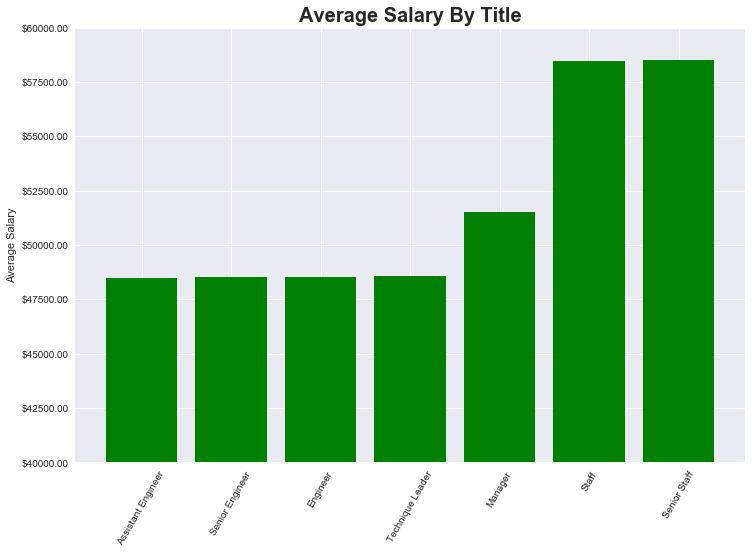

In [74]:
# Set figure width to 12 and height to 8
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
#Rotate x labels 
plt.xticks(rotation=60)
#set y axis [average salary] limits
plt.ylim(40000.0, 60000.0)
#foramt salary as $
ax=plt.gca()
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
# Create a  bar chart and plot the `average_salary` on the x-axis and the `score` on the x-axis
plt.bar(titles, avg_salary, color='green')
plt.ylabel("Average Salary")
plt.title("Average Salary By Title", fontsize = 20, weight = "bold")
plt.show()